In [24]:
from keras.datasets import mnist

import keras
from keras import callbacks
from keras.models import Model
from keras.optimizers import Adadelta
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D

In [25]:
import numpy as np
(trainX, trainy), (testX, testy) = mnist.load_data()


In [26]:
trainX = np.expand_dims(trainX, axis= -1)
testX = np.expand_dims(testX, axis= -1)
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32")   / 255.0

In [27]:
trainNoise = np.random.normal(loc=0.5, scale=0.5, size=trainX.shape)
testNoise = np.random.normal(loc=0.5, scale=0.5, size=testX.shape)
trainXNoisy = np.clip(trainX + trainNoise, 0, 1)
testXNoisy = np.clip(testX + testNoise, 0, 1)

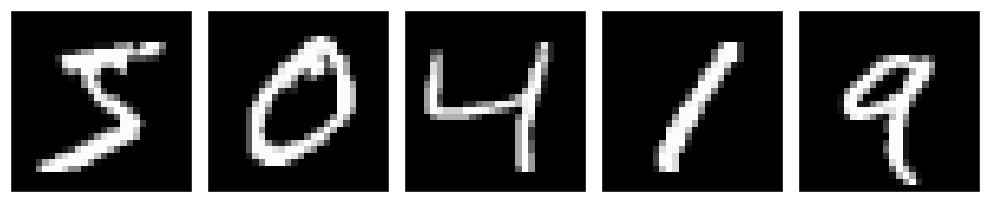

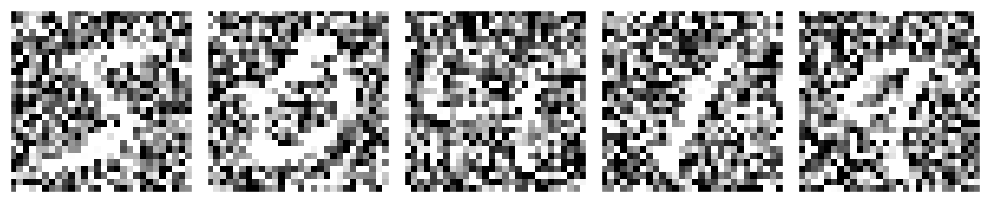

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i].reshape(28, 28), cmap='gray')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainXNoisy[i].reshape(28,28), cmap='gray')
plt.tight_layout()
plt.show()

In [29]:
input_img = Input(shape=(28,28,1))
X = Conv2D(32,(3,3), activation='relu', padding='same')(input_img)
X = MaxPool2D((2,2), padding='same')(X)
X = Conv2D(32,(3,3), activation='relu', padding='same')(X)
encoded = MaxPool2D((2,2), padding='same')(X)
X = Conv2D(32, (3,3), activation='relu', padding='same')(encoded)
X = UpSampling2D((2,2))(X)
X = Conv2D(32, (3,3), activation='relu', padding='same')(X)
X = UpSampling2D((2,2))(X)

decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(X)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss= 'binary_crossentropy')


Epoch 1/100
1875/1875 [==============================] - 25s 13ms/step - loss: 0.5527 - val_loss: 0.4772
Epoch 2/100
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4556 - val_loss: 0.4394
Epoch 3/100
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4104 - val_loss: 0.3824
Epoch 4/100
1875/1875 [==============================] - 25s 14ms/step - loss: 0.3473 - val_loss: 0.3202
Epoch 5/100
1875/1875 [==============================] - 25s 14ms/step - loss: 0.3008 - val_loss: 0.2884
Epoch 6/100
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2789 - val_loss: 0.2719
Epoch 7/100
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2648 - val_loss: 0.2587
Epoch 8/100
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2523 - val_loss: 0.2465
Epoch 9/100
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2407 - val_loss: 0.2350
Epoch 10/100
1875/1875 [==============================]

<function matplotlib.pyplot.show(close=None, block=None)>

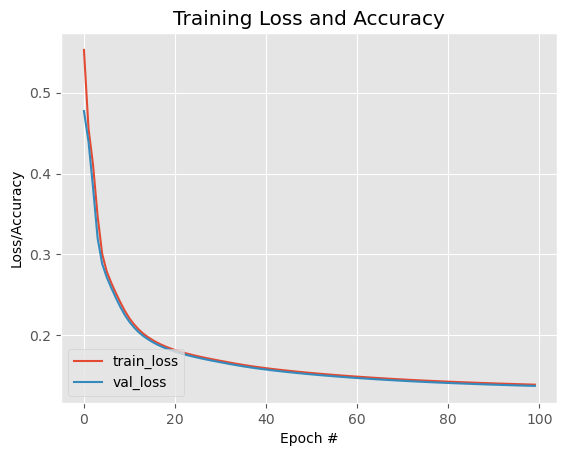

In [30]:
H = autoencoder.fit(
    trainXNoisy, trainX,
    validation_data=(testXNoisy, testX),
    epochs=100,
    batch_size=32)
N = np.arange(0, 100)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc= "lower left")
plt.show


313/313 [==============================] - 2s 5ms/step


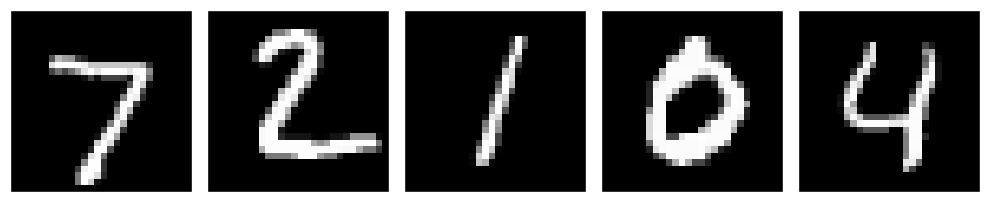

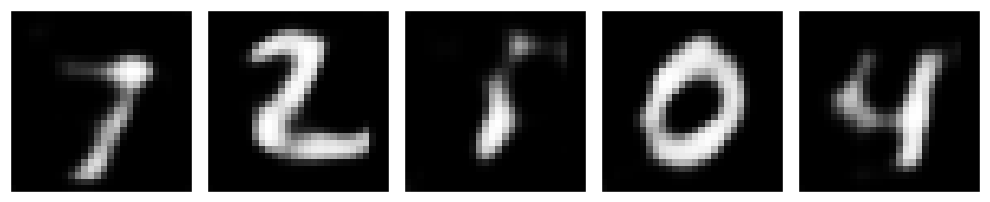

In [31]:
pred = autoencoder.predict(testXNoisy)
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testX[i].reshape(28, 28), cmap='gray')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(pred[i].reshape(28, 28), cmap='gray')
plt.tight_layout()
plt.show()            